In [ ]:
!pip install tensorflow

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install opencv-python

In [3]:
import numpy as np
import pandas as pd

In [4]:
ls = []
import os
for dirname, _, filenames in os.walk('Dataset'):
    for filename in filenames:
        ls.append(os.path.join(dirname, filename))
ls[0]
print(len(ls))

4895


In [5]:
# Necessary Imports
import cv2
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import os
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [6]:
# Path to Dataset Input
path = "Dataset/Indian-monuments/images"
# Walk through the directory and list number of files
for dirpath, dirnames, filenames in os.walk(path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Dataset/Indian-monuments/images'.
There are 24 directories and 0 images in 'Dataset/Indian-monuments/images\test'.
There are 0 directories and 31 images in 'Dataset/Indian-monuments/images\test\Ajanta Caves'.
There are 0 directories and 36 images in 'Dataset/Indian-monuments/images\test\alai_darwaza'.
There are 0 directories and 35 images in 'Dataset/Indian-monuments/images\test\alai_minar'.
There are 0 directories and 30 images in 'Dataset/Indian-monuments/images\test\basilica_of_bom_jesus'.
There are 0 directories and 34 images in 'Dataset/Indian-monuments/images\test\Charar-E- Sharif'.
There are 0 directories and 40 images in 'Dataset/Indian-monuments/images\test\charminar'.
There are 0 directories and 30 images in 'Dataset/Indian-monuments/images\test\Chhota_Imambara'.
There are 0 directories and 34 images in 'Dataset/Indian-monuments/images\test\Ellora Caves'.
There are 0 directories and 42 images in 'Dataset/Indian-monuments/images\test\Fa

In [7]:
# append the training and the testing paths to the original path
train_dir =  path + "/train/"
test_dir = path + "/test/"
train_dir

'Dataset/Indian-monuments/images/train/'

In [8]:
# get all the class names
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['Ajanta Caves', 'Charar-E- Sharif', 'Chhota_Imambara',
       'Ellora Caves', 'Fatehpur Sikri', 'Gateway of India',
       'Humayun_s Tomb', 'India gate pics', 'Khajuraho',
       'Sun Temple Konark', 'alai_darwaza', 'alai_minar',
       'basilica_of_bom_jesus', 'charminar', 'golden temple',
       'hawa mahal pics', 'iron_pillar', 'jamali_kamali_tomb',
       'lotus_temple', 'mysore_palace', 'qutub_minar', 'tajmahal',
       'tanjavur temple', 'victoria memorial'], dtype='<U21')

In [9]:
# function used to view an random image
def view_random_image(target_dir, target_class):
    target_folder = target_dir  + target_class
    
  # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

Image shape: (194, 259, 3)


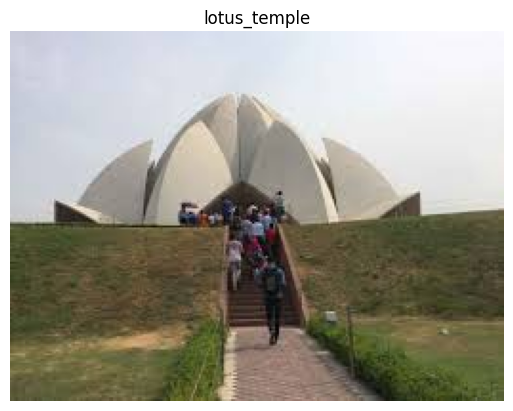

In [10]:
#View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names)) # get a random class name

In [11]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(300, 300),
                                               batch_size=32,
                                               class_mode='categorical') 

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(300, 300),
                                              batch_size=32,
                                              class_mode='categorical')

Found 3666 images belonging to 24 classes.
Found 1049 images belonging to 24 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [13]:
# Create our model 
model = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(300, 300, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(24, activation='softmax')
])

use a saved trained model

In [26]:
model = keras.models.load_model('saved_trained_model')

In [14]:
model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history = model.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
115/115 [==============================] - 252s 2s/step - loss: 2.5535 - accuracy: 0.3011 - val_loss: 2.8795 - val_accuracy: 0.3051
Epoch 2/5
115/115 [==============================] - 176s 2s/step - loss: 1.0869 - accuracy: 0.7035 - val_loss: 3.1834 - val_accuracy: 0.4242
Epoch 3/5
115/115 [==============================] - 151s 1s/step - loss: 0.3507 - accuracy: 0.9285 - val_loss: 3.9511 - val_accuracy: 0.4223
Epoch 4/5
115/115 [==============================] - 129s 1s/step - loss: 0.0982 - accuracy: 0.9839 - val_loss: 4.8336 - val_accuracy: 0.4395
Epoch 5/5
115/115 [==============================] - 126s 1s/step - loss: 0.0382 - accuracy: 0.9981 - val_loss: 5.1792 - val_accuracy: 0.4261


<function matplotlib.pyplot.show(close=None, block=None)>

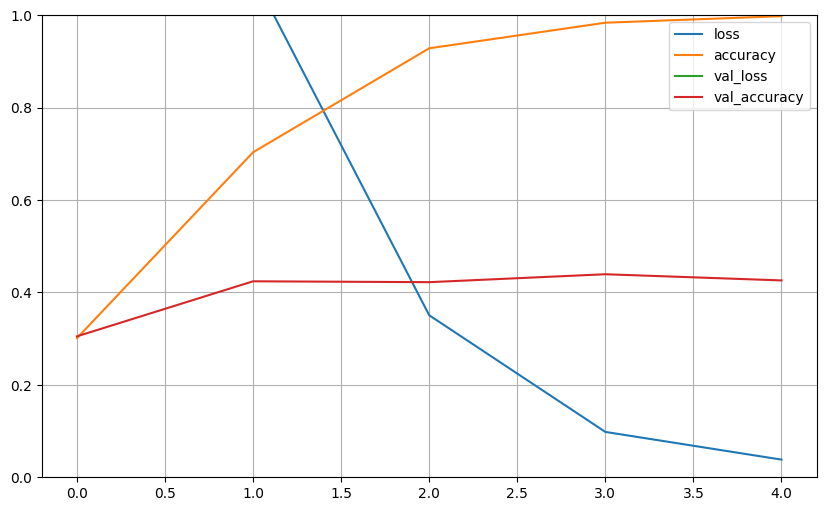

In [15]:
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show

In [16]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=300):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
    
  return img

# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 166ms/step


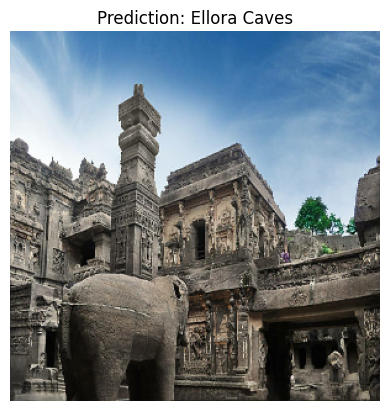

In [17]:
# make a new prediction
pred_and_plot(model, "Dataset/Indian-monuments/images/test/Ellora Caves/1.jpg", class_names)

1/1 [==============================] - 0s 33ms/step


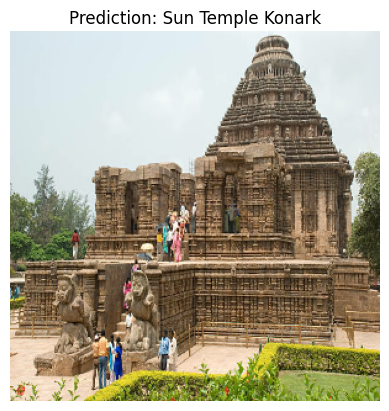

In [18]:
pred_and_plot(model, "Dataset/Indian-monuments/images/test/Sun Temple Konark/14.jpg", class_names)

1/1 [==============================] - 0s 38ms/step


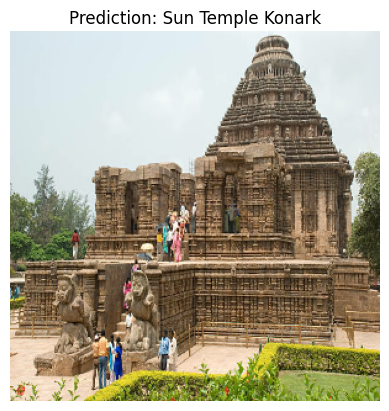

In [19]:
pred_and_plot(model, "Dataset/Indian-monuments/images/test/Sun Temple Konark/14.jpg", class_names)

1/1 [==============================] - 0s 28ms/step


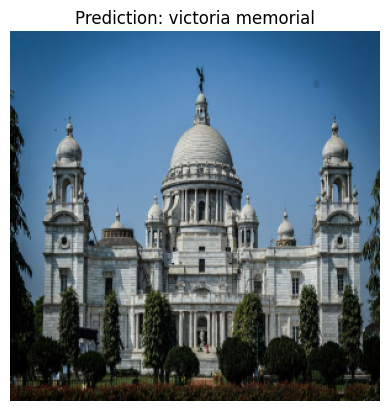

In [20]:
pred_and_plot(model, "Dataset/Indian-monuments/images/test/victoria memorial/177.jpg", class_names)

1/1 [==============================] - 0s 28ms/step


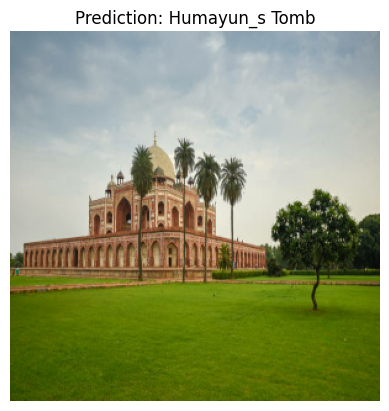

In [21]:
pred_and_plot(model, "Dataset/Indian-monuments/images/test/Humayun_s Tomb/25.jpg", class_names)

1/1 [==============================] - 0s 33ms/step


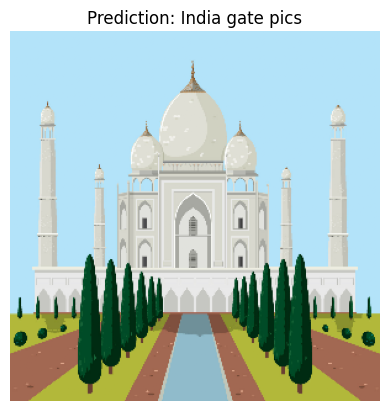

In [22]:
pred_and_plot(model, "D:/Downloads/tajmahal_test.jpg", class_names)

1/1 [==============================] - 0s 29ms/step


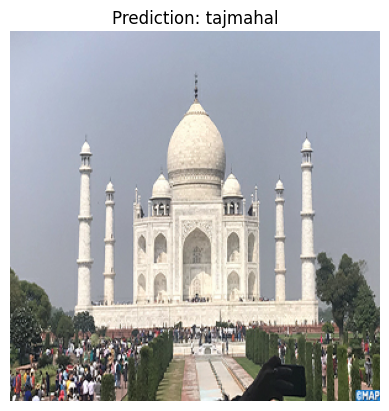

In [23]:
pred_and_plot(model, "D:/Downloads/Taj-Mahal-M.jpg", class_names)

In [ ]:
# save the model
model.save("saved_trained_model")